Step 1 — Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib


Step 2 — Load Dataset

In [3]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


Step 3 — Train Test Split (same for all models)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Step 4 — Feature Scaling (important for LR & SVM)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 5 — Create Models

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


Step 6 — Train, Predict, Evaluate

In [9]:
results = []

for name, model in models.items():
    
    # Use scaled data for LR and SVM
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, train_score, test_score, acc, prec, rec, f1])


Step 7 — Create Comparison Table

In [10]:
columns = ["Model", "Train Score", "Test Score", "Accuracy", "Precision", "Recall", "F1 Score"]

comparison_df = pd.DataFrame(results, columns=columns)
print(comparison_df)


                 Model  Train Score  Test Score  Accuracy  Precision  \
0  Logistic Regression     0.989011    0.982456  0.982456   0.986111   
1        Decision Tree     1.000000    0.885965  0.885965   0.953846   
2        Random Forest     1.000000    0.956140  0.956140   0.958904   
3                  SVM     0.982418    0.982456  0.982456   0.986111   

     Recall  F1 Score  
0  0.986111  0.986111  
1  0.861111  0.905109  
2  0.972222  0.965517  
3  0.986111  0.986111  


Step 8 — Plot Comparison Bar Chart

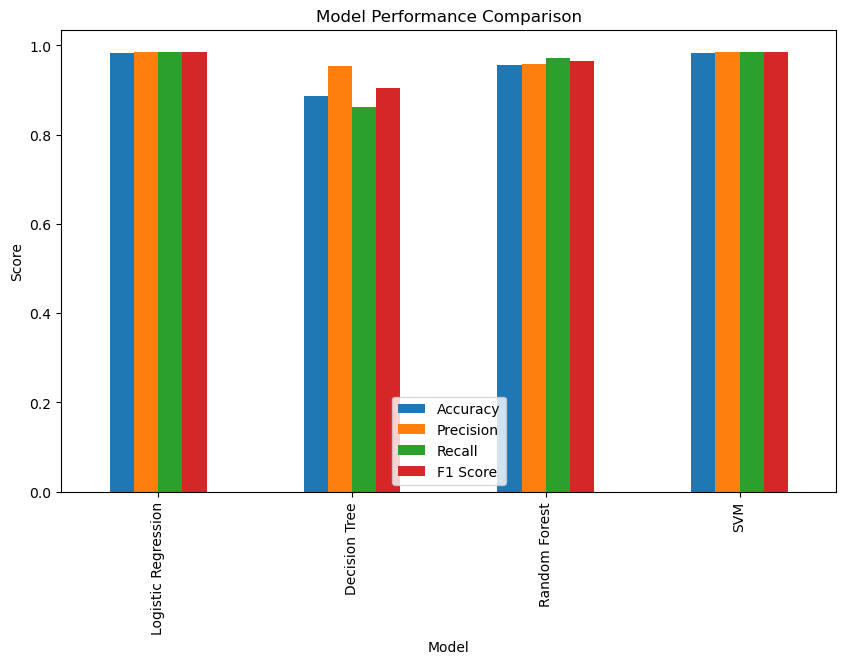

In [11]:
comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


Step 9 — Detect Overfitting (Train vs Test)

In [12]:
print(comparison_df[["Model", "Train Score", "Test Score"]])


                 Model  Train Score  Test Score
0  Logistic Regression     0.989011    0.982456
1        Decision Tree     1.000000    0.885965
2        Random Forest     1.000000    0.956140
3                  SVM     0.982418    0.982456


Step 10 — Select Best Model

In [13]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

joblib.dump(best_model, "best_model.pkl")
print("Best model saved!")


Best model saved!
